# Завдання на використання SQL в Python

1.Встановіть бібліотеку `mysql-connector-python` через pip aбо через conda.

In [1]:
%pip install mysql-connector-python

Note: you may need to restart the kernel to use updated packages.


In [2]:
!pip freeze | grep mysql-connector-python

mysql-connector-python==9.3.0


In [1]:
import mysql.connector
from mysql.connector.connection import MySQLConnection

2.В змінній `con` створіть підключення до бази даних employees за аналогією того, як це робилось в лекції:

In [6]:
employees_con = mysql.connector.connect(user='root', password='Sheik1337', host='127.0.0.1', database='employees')

In [ ]:
con = mysql.connector.connect(user='user1', password='7oygWy6P', host='3.68.62.36', database='employees')

3.Виберіть максимальну і мінімальну дати найму співробітників використовуючи `con.cursor()`. Аби отримати результати в кінці, виконайте `cursor.fetchall()`.

In [7]:
cursor = employees_con.cursor()

sql = """
    SELECT MAX(hire_date), MIN(hire_date)
    FROM employees
"""

cursor.execute(sql)

In [8]:
cursor.fetchall()

[(datetime.date(2000, 1, 28), datetime.date(1985, 1, 1))]

In [6]:
cursor.close()

True

Очікуваний результат:  
    `[(datetime.date(2000, 1, 28), datetime.date(1985, 1, 1))]`

4.Давайте зберемо інформацію про останню ЗП кожного співробіткника в базі. З використанням `con.cursor()` виберіть з таблиці `salaries` для кожного співробітника його номер, останню в базі даних (тобто ту, що відповідає найновішій `to_date`) ЗП, та значення `from_date`, `to_date` для цієї ЗП.

Результати запишіть у pandas DataFrame, який збережіть у змінну `res`. Як взяти з курсора назви колонок - вже наведено. На екран виведіть назви колонок в змінній `res`, розмір цього датафрейму та перші 3 записи в ньому.

УВАГА! Зверніть увагу, що ЗП може оновлюватись протягом одного дня, тобто є випадки, коли апдейт ЗП був в певний день, скажімо 2001-01-01 і потім стався ще один апдейт ЗП цьому співробітнику цього самого дня. Запит має це враховувати.
Також, теоретично ЗП може бути зменшена. Тож, брати дату з максимальною ЗП буде неправильно з точки зору бізнес логіки. Треба саме останнє історичне значення ЗП кожного співробітника.

In [ ]:
field_names = [i[0] for i in cursor.description]

In [4]:
import pandas as pd

In [9]:
cursor = employees_con.cursor()

In [10]:
sql2 = """
SELECT s1.emp_no, s1.salary, s1.to_date, s1.from_date
FROM salaries s1
JOIN (
    SELECT emp_no, MAX(to_date) AS max_to_date
    FROM salaries
    GROUP BY emp_no
) s2
ON s1.emp_no = s2.emp_no AND s1.to_date = s2.max_to_date
ORDER BY s1.emp_no;
"""

cursor.execute(sql2)
res = cursor.fetchall()

field_names = [i[0] for i in cursor.description]
res = pd.DataFrame(res, columns=field_names)

head_res = res.head(3)
print(head_res)


   emp_no  salary     to_date   from_date
0   10001   88958  9999-01-01  2002-06-22
1   10002   72527  9999-01-01  2001-08-02
2   10003   43311  9999-01-01  2001-12-01


In [11]:
cursor.fetchmany(10)

[]

Очікуваний результат:

![](https://drive.google.com/uc?export=view&id=1lNvzbAebtkj3C2v-I5AE6HkMH8MTI1kA)

5.В утвореній вибірці в змінній `res` скільки значень `to_date` рівні `9999-01-01`, а скільки - ні? Увага! Для виконання цього завдання важливо розуміти, який тип даних у значень колонки `to_date`. Зʼясуйте це, і потім напишіть фільтр для виводу потрібного результату.

In [11]:
res.dtypes

emp_no        int64
salary        int64
to_date      object
from_date    object
dtype: object

In [13]:
res['to_date'] = res['to_date'].astype(str)


In [14]:
res['to_date'].head(5)

0    9999-01-01
1    9999-01-01
2    9999-01-01
3    9999-01-01
4    9999-01-01
Name: to_date, dtype: object

In [15]:
count_9999 = (res['to_date'] == '9999-01-01').sum()
count_not_9999 = (res['to_date'] != '9999-01-01').sum()

print('The amount of values equals to to_date: ', count_9999)
print('The amount of values that arent equal to target_date', count_not_9999)


The amount of values equals to to_date:  240124
The amount of values that arent equal to target_date 60056


In [ ]:
res['to_date'] = pd.to_datetime(res['to_date'], errors='coerce')

target_date = pd.Timestamp('9999-01-01')

count_9999 = (res['to_date'] == target_date).sum()
count_not_9999 = (res['to_date'] != target_date).sum()

print('The amount of values equals to to_date: ', count_9999)
print('The amount of values that arent equal to target_date', count_not_9999)



In [ ]:
from datetime import date

target_date = date(9999, 1, 1)

count_equal = res[res['to_date'] == target_date].shape[0]
count_not_equal = res[res['to_date'] != target_date].shape[0]

print('The amount of values equals to to_date: ', count_equal)
print('The amount of values that arent equal to target_date', count_not_equal)

6.Виведіть візуально розподіл (гістограму) зарплат співробітників, які досі працюють в компанії, використовуючи результат попереднього завдання. Співробітниками, які досі працюють в компанії вважаємо тих, в кого to_date має значення 9999-01-01. Обовʼязково підпишіть графік і вісі.

Ці три завдання - приклад, як нам може бути зручно витягнути дані з бази певним запитом, а потім використати витягнуту вибірку у Python для подальшого аналізу.

In [18]:
import pandas as pd,  matplotlib.pyplot as plt

In [34]:
res['to_date']

0        NaT
1        NaT
2        NaT
3        NaT
4        NaT
          ..
300175   NaT
300176   NaT
300177   NaT
300178   NaT
300179   NaT
Name: to_date, Length: 300180, dtype: datetime64[ns]

In [37]:
res['to_date'].unique()[:10]

<DatetimeArray>
[                'NaT', '2000-07-31 00:00:00', '1996-11-09 00:00:00',
 '1993-08-22 00:00:00', '2002-07-15 00:00:00', '1997-10-15 00:00:00',
 '1998-04-06 00:00:00', '1993-03-24 00:00:00', '1999-10-31 00:00:00',
 '2000-08-10 00:00:00']
Length: 10, dtype: datetime64[ns]

In [58]:
print(res['to_date'].head(10))
print(res['to_date'].dtype)


0          NaT
1          NaT
2          NaT
3          NaT
4          NaT
5          NaT
6          NaT
7   2000-07-31
8          NaT
9          NaT
Name: to_date, dtype: datetime64[ns]
datetime64[ns]


In [ ]:
current_salary_employees = res[res['to_date'].isna()]

current_salary_employees

,emp_no,salary,to_date,from_date
0,10001,88958,NaT,2002-06-22
1,10002,72527,NaT,2001-08-02
2,10003,43311,NaT,2001-12-01
3,10004,74057,NaT,2001-11-27
4,10005,94692,NaT,2001-09-09
...,...,...,...,...
300175,499995,52868,NaT,2002-06-01
300176,499996,69501,NaT,2002-05-12
300177,499997,83441,NaT,2001-08-26
300178,499998,55003,NaT,2001-12-25


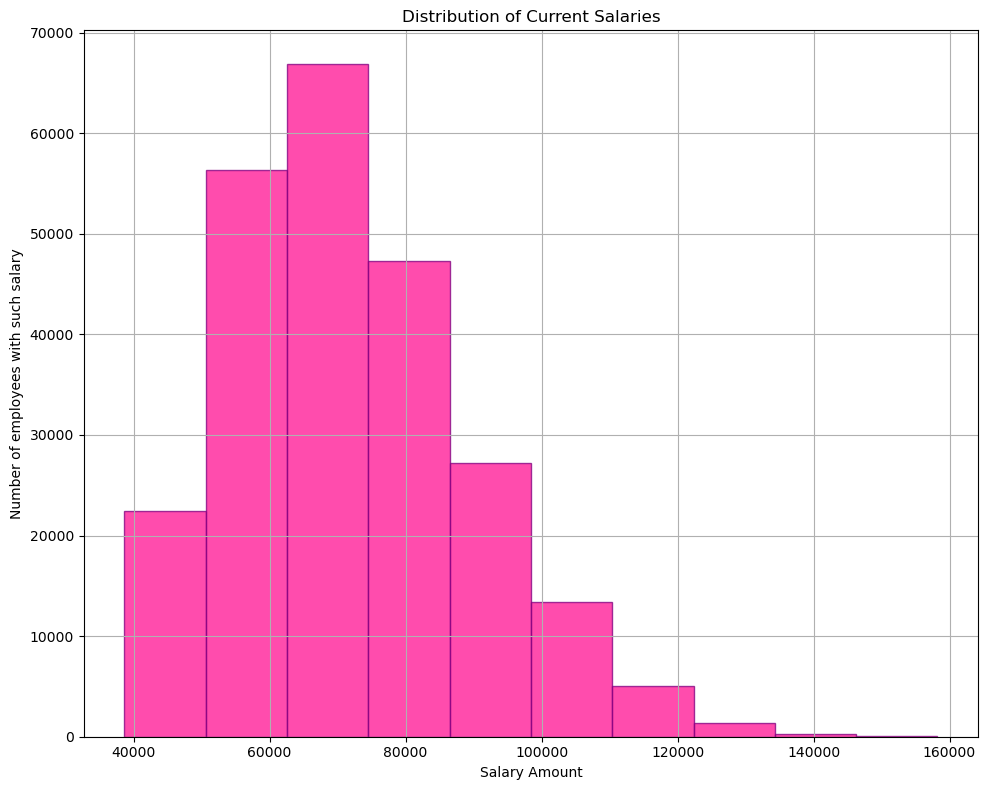

In [69]:
fig, ax = plt.subplots(figsize=(10, 8))
current_salary_employees = res[res['to_date'].isna()]


ax.hist(current_salary_employees['salary'], 
        bins=10,  
        color='deeppink',
        edgecolor='purple',
        alpha=0.76)

ax.set(
    title='Distribution of Current Salaries',
    xlabel='Salary Amount',
    ylabel='Number of employees with such salary',

)

ax.grid(True)
fig.tight_layout()
plt.show();


Очікуваний результат:

![](https://drive.google.com/uc?export=view&id=1j8MHLC1E0revbQLM9B0UJs6tVEgoWhmK)

НЕ ЗАБУВАЄМО ЗАКРИТИ ПІДКЛЮЧЕННЯ ДО БАЗИ :)

In [71]:
employees_con.close()